In [1]:
# imports:

import numpy as np
import pandas as pd
import os
import sklearn
import csv
import pickle
import time
import matplotlib.pyplot as plt
import random
from scipy import integrate
from scipy import signal
from scipy import optimize
from scipy.fft import fft, ifft, fftfreq, rfft, rfftfreq,irfft

%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest 
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import GroupKFold, StratifiedKFold, KFold, StratifiedGroupKFold
from sklearn.model_selection import learning_curve
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_error, make_scorer

In [2]:
# %matplotlib notebook

In [3]:
#Just a basic function to alert me when the code is finished

import winsound

def make_noise():
  duration = 5000  # milliseconds
  freq = 440  # Hz
  winsound.Beep(freq, duration)

In [4]:
student_id='01908876'

In [5]:
DATAPATH_meta = '..//data//train_meta.csv'

In [6]:
df_meta = pd.read_csv(DATAPATH_meta)
df_meta

,id,direction,group,label,speed
0,0,V,DAQ_8,-0.2,425
1,1,H,DAQ_1,0.0,750
2,2,V,DAQ_1,0.0,425
3,3,V,DAQ_9,-0.3,750
4,4,H,DAQ_9,-0.3,750
...,...,...,...,...,...
1095,1095,V,DAQ_1,0.0,425
1096,1096,H,DAQ_10,-0.4,425
1097,1097,H,DAQ_1,0.0,750
1098,1098,V,DAQ_6,0.5,425


In [7]:
grouped_class = df_meta.groupby('group')['label'].apply(np.array)
print(grouped_class)

group
DAQ_1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
DAQ_10    [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0....
DAQ_11    [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....
DAQ_2     [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...
DAQ_3     [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...
DAQ_4     [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, ...
DAQ_5     [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...
DAQ_6     [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...
DAQ_7     [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0....
DAQ_8     [-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0....
DAQ_9     [-0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0....
Name: label, dtype: object


the group names correspond to label names

array([[<Axes: title={'center': 'label'}>]], dtype=object)

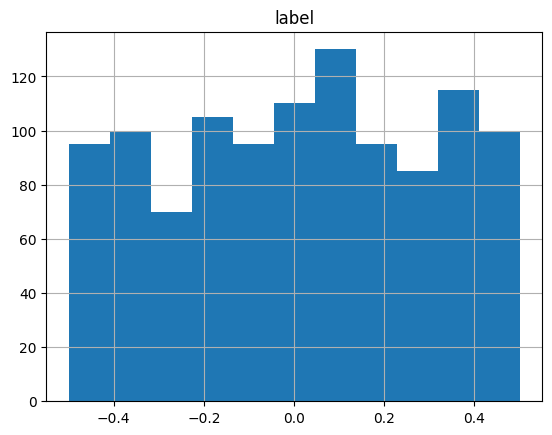

In [8]:
labels = df_meta['label']
unique_labels = pd.unique(labels)
num_unique_labels = np.size(unique_labels)
df_meta.hist('label',bins=num_unique_labels)

array([[<Axes: title={'center': 'speed'}>]], dtype=object)

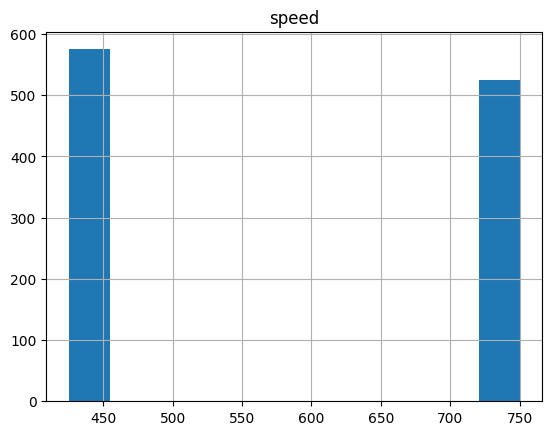

In [9]:
df_meta.hist('speed',bins=num_unique_labels)

2049
[]
[] [] [] 425,0.0 
2049
[  9  11  13  16  19  21  48  80 112 176]
[  9  11  13  16  19  21  48  80 112 176] [0.02142629 0.03306342 0.04748833 0.21135858 0.04331621 0.02429903
 0.08797117 0.03909737 0.03680834 0.02346077] [ 28.125  34.375  40.625  50.     59.375  65.625 150.    250.    350.
 550.   ] 750,0.5 


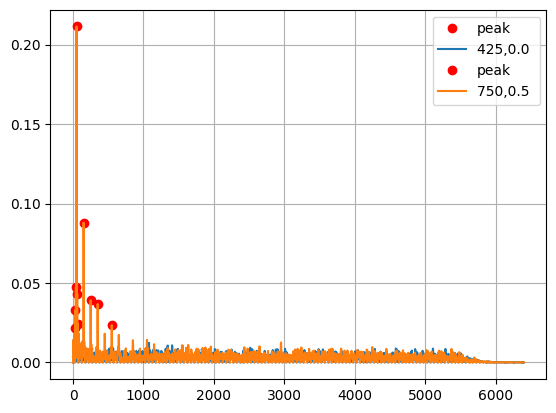

In [11]:
### I'm taking the fourier transform of the data and investegated it

DATAPATH = [f"../data/train/train_{i}.csv" for i in df_meta["id"]] ###specifing the datapath for all the deferent samples

grouped_class = df_meta.groupby('group')['id'].apply(np.array) ###

fig, ax = plt.subplots(1)
# plt.setp(ax, xticks=np.arange(5, 15,1))
peaks = []
for i in range(0,6,5): #### for selecting the label
    peaks_group = []
    # for id in grouped_class[f'DAQ_{i+1}']:  ### for looking at all the sample with a certain label
    for e in range(1): ### for looking at a specific number of samples with a certain label
        id = random.choice(grouped_class[f'DAQ_{i+1}']) ### randomly select a sample within the label group
        # while df_meta['speed'][id] != 750: ### In case you want to look at specific speeds
        #     id = random.choice(grouped_class[f'DAQ_{i+1}'])
        # if df_meta['speed'][id] == 750: ### To look at specific speeds when looking at all samples of a label group

        #putting a datasample in a dataframe
        df = pd.read_csv(DATAPATH[id])



        # ax.plot(df.iloc[:,0],df[str(0)]/150, label = f"{df_meta['speed'][id]},{df_meta['label'][id]} ")
        # ax.plot(df.iloc[:,0],df[str(2)]-np.mean(df[str(2)]), label = f"{df_meta['speed'][id]},{df_meta['label'][id]} ")


        ### the real fourrier transform of the acceleration shifted to remove 0 frequency peak in the fourrier spectrum

        rft = np.abs(rfft(df[str(2)].values-np.mean(df[str(2)].values),n=4096)) 
        print(np.size(rft))
        ### window of intresting frequencies
        # res = []
        # for i in range(3):
        #     res.append(np.argwhere(freq>=750*(i+1)-3.2)[0,0])
        #     res.append(np.argwhere(freq>=425*(i+1)-3.2)[0,0])

        ##### frequencies of the spectrum
        freq = rfftfreq(4096,d=1/12800)
        
        ### peak detection on the spectrum
        rft[8::16] =0
        indices = signal.find_peaks(np.real(rft),height=0.02)[0]
        print(indices)
        ### plot of the spectrum
        ax.plot(freq[indices],rft[indices], marker ='o',linestyle=' ',color = 'red', label = f"peak")
        ax.plot(freq,rft,label = f"{df_meta['speed'][id]},{df_meta['label'][id]} ")
        print(indices, rft[indices],freq[indices],f"{df_meta['speed'][id]},{df_meta['label'][id]} ")
        # ax.plot(freq[low_1:high_2],rft[low_1:high_2],label = f"{df_meta['speed'][id]},{df_meta['label'][id]} ")
        # ax.plot(freq[low_2:high_2],rft[low_2:high_2],label = f"{df_meta['speed'][id]},{df_meta['label'][id]} ")

        ### putting the values of intresting frequencies in a list to use in training
        # peaks_group.append(rft[res].tolist())
    peaks.append(peaks_group)
    
ax.grid(which='both')
plt.legend()
plt.show()

In [12]:
ar = np.array([1,1,1,1,1,1,1,1,1,1,1])
ar[::2] = 0
print(ar)

[0 1 0 1 0 1 0 1 0 1 0]


In [13]:
### attempt at taking the average of 
print("=============mean================")
means = []
for i in range(len(peaks)):
    means.append(np.mean(peaks[i],axis=0))
means = np.asanyarray(means)
print(means)

=============mean================
[nan nan]


C:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Khaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


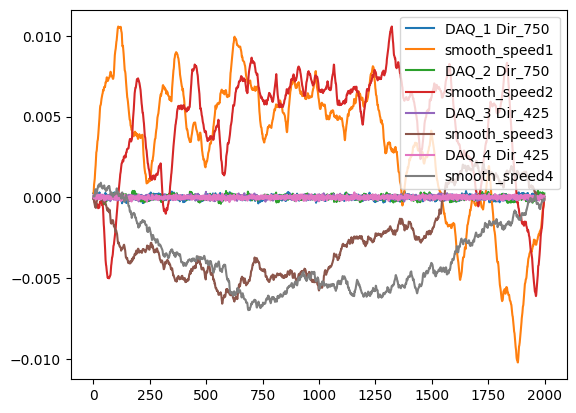

In [14]:
#### plot of data
for e in range(4):
    id = random.choice(grouped_class[f'DAQ_{e+1}'])
    df = pd.read_csv(DATAPATH[id])

    
    ### code to smoothen the data
    N = np.size(df[str(2)].values)
    rft = rfft(df[str(2)].values)
    rft[8::16] =0
    smooth = irfft(rft, N)
    
    ### speed ex
    smooth -= np.mean(smooth)
    plt.plot(df.iloc[:,0],smooth,label=f"DAQ_{e+1} Dir_{df_meta['speed'][id]}")
    smooth_speed = np.real(integrate.cumulative_trapezoid(smooth, x = df.iloc[:,0]))
    plt.plot(df.iloc[1:,0],smooth_speed,label=f'smooth_speed{e+1}')

plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error

Mean absolute error:

sample 0
DAQ0: 23.67015648154494DAQ1: 40.44322044336285
sample 1
DAQ0: 20.56787505369264DAQ1: 36.886951768445876
sample 2
DAQ0: 18.881318722804867DAQ1: 40.44322044336285
sample 3
DAQ0: 22.09572808578966DAQ1: 36.886951768445876

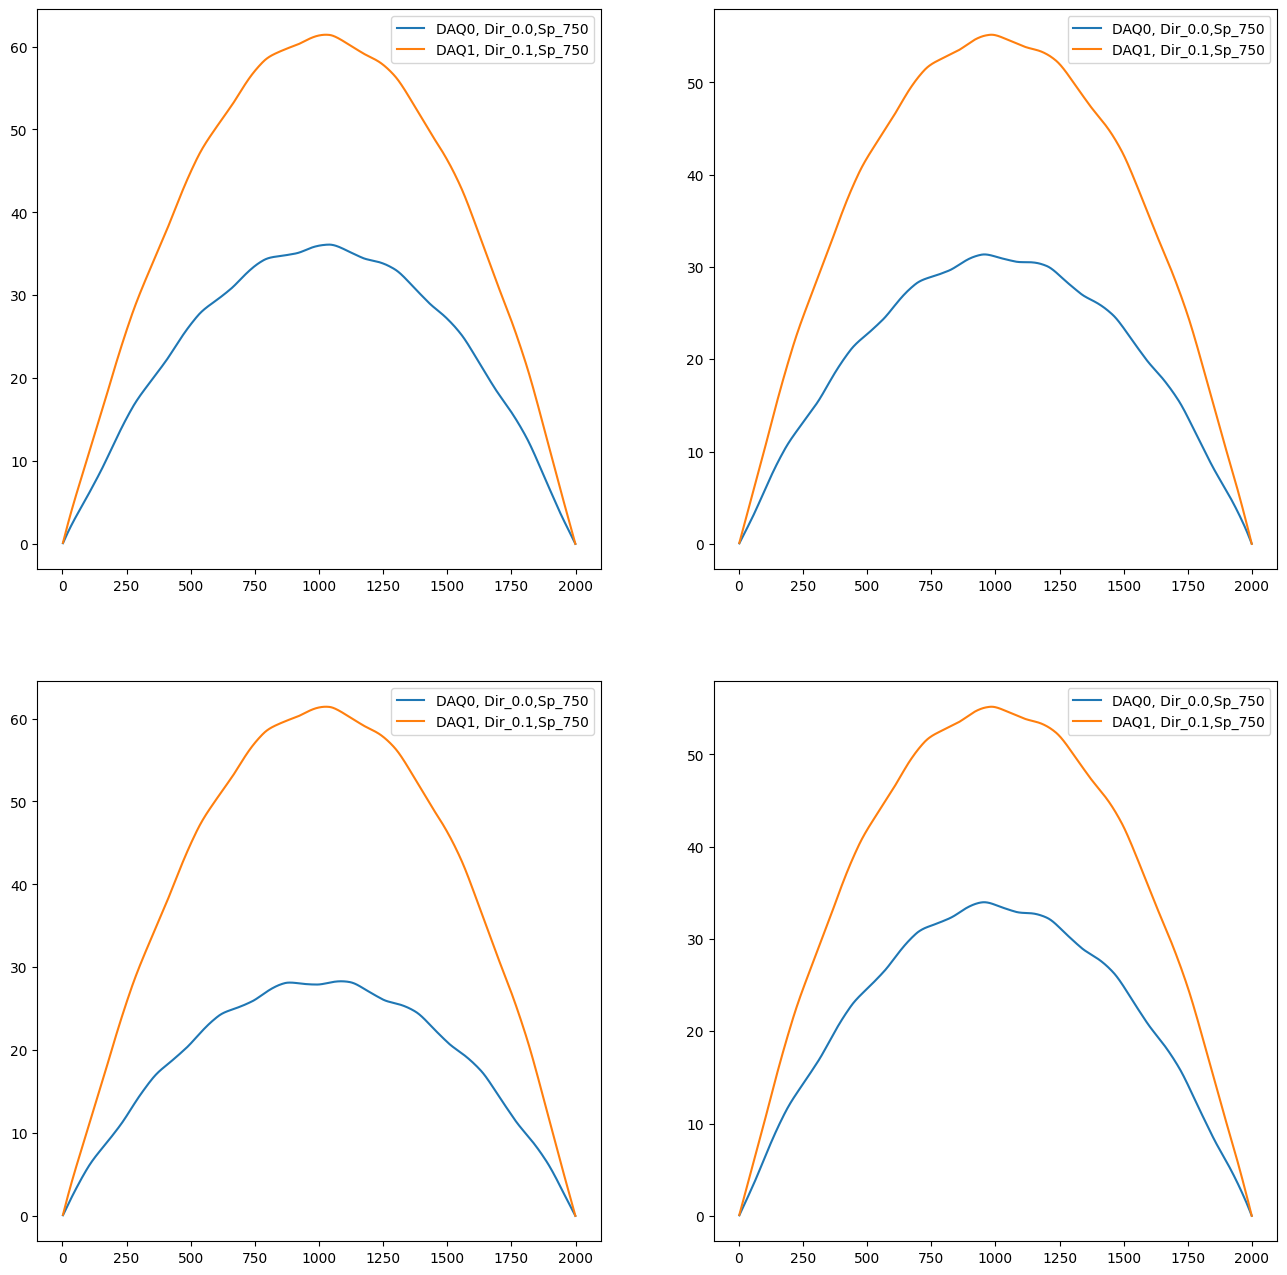

In [16]:
### speed and position extraction with plots

fig, ax = plt.subplots(2,2,figsize = (16,16))
print("Mean absolute error:")
for i in range(4):
    print(f"\nsample {i}")
    for e in range(2):
        
        id = random.choice(grouped_class[f'DAQ_{e+1}'])
        while df_meta['speed'][id] == 425:
            id = random.choice(grouped_class[f'DAQ_{e+1}'])
            
        df = pd.read_csv(DATAPATH[id])
        
        ### code to smoothen the data
        N = np.size(df[str(2)].values)
        rft = rfft(df[str(2)].values)
        # rft[0] = 0
        rough = irfft(rft,N)
        # rft[8::16] =0
        # rft[50:]=0
        # smooth = irfft(rft, N)
        # smooth -= np.mean(smooth)
        
        # ax[i//2,i%2].plot(df.iloc[:,0],smooth,label=f'DAQ{e}')

        speed = np.real(integrate.cumulative_trapezoid(rough, x = df.iloc[:,0]))
        
        N = np.size(speed)
        rft = rfft(speed)
        rft[0] = 0
        speed = irfft(rft,N)
    
        position = np.real(integrate.cumulative_trapezoid(speed, x = df.iloc[1:,0]))
        
        # speed_smooth = np.real(integrate.cumulative_trapezoid(smooth, x = df.iloc[:,0]))
        # position_smooth = np.real(integrate.cumulative_trapezoid(speed_smooth, x = df.iloc[1:,0]))
        
        ax[i//2,i%2].plot(df.iloc[2:,0],position,label=f"DAQ{e}, Dir_{df_meta['label'][id]},Sp_{df_meta['speed'][id]}")

        # ax[i//2,i%2].plot(df.iloc[2:,0],position_smooth,label=f"DAQ{e}, Dir_{df_meta['label'][id]},Sp_{df_meta['speed'][id]},smooth")
        ax[i//2,i%2].legend()
        print(f"DAQ{e}: {mean_absolute_error(np.zeros_like(position),position)}",end="")
plt.show()

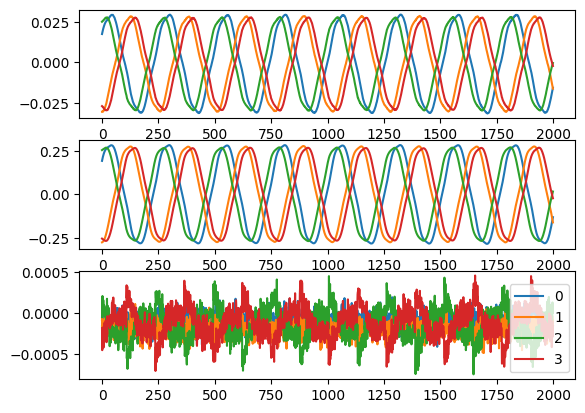

In [17]:
### some more plots of the data

df = []

df.append(pd.read_csv(DATAPATH[random.choice(grouped_class['DAQ_1'])]))
df.append(pd.read_csv(DATAPATH[random.choice(grouped_class['DAQ_2'])]))
df.append(pd.read_csv(DATAPATH[random.choice(grouped_class['DAQ_3'])]))
df.append(pd.read_csv(DATAPATH[random.choice(grouped_class['DAQ_4'])]))


fig, ax = plt.subplots(3,1)

for i in range(3):
    for e in range(4):
        ax[i].plot(df[e].iloc[:,0],df[e][str(i)],label = f"{e}")
plt.legend()
plt.show()

In [18]:
#### means of the data

for e in range(1,12):
    name = f'DAQ_{e}'
    mean = []
    for i in grouped_class[name]:
        mean.append(np.mean(pd.read_csv(DATAPATH[i])['2']))
    if e == 1:
        new_df = pd.DataFrame(data = mean , columns = [name])
    else:
        df = pd.DataFrame(data = mean, columns = [name])
        new_df = pd.concat([new_df,df], axis = 1)


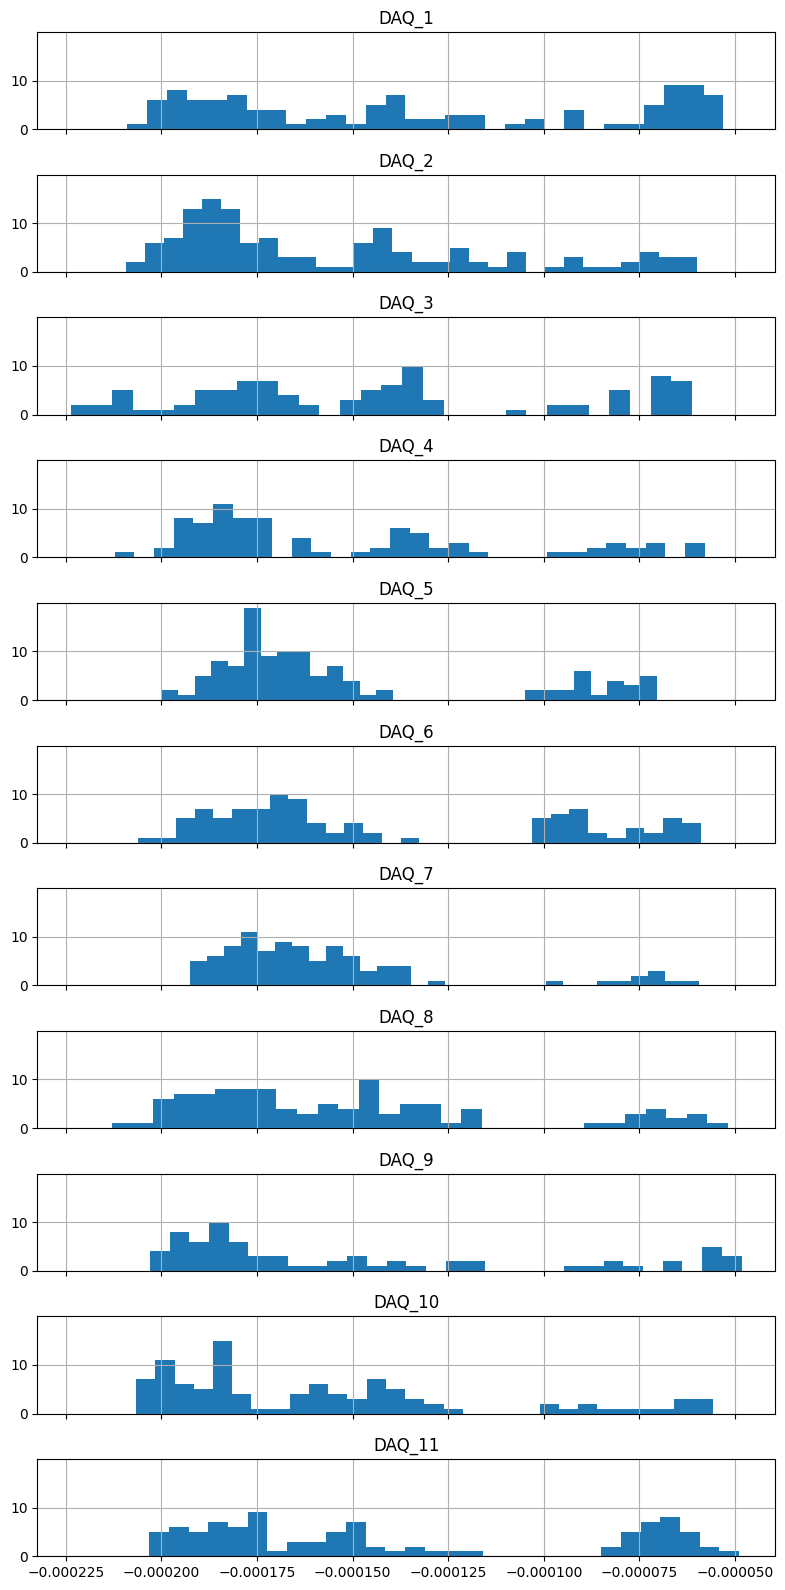

In [19]:
### histogram plot of the mean

fig, ax = plt.subplots(11,1,figsize=(8,16),sharex=True, sharey=True)
for i in range(1,12):
    new_df.hist(f'DAQ_{i}',bins=30,ax = ax[i-1])
    
fig.tight_layout()
plt.show()

In [20]:
### putting all the training data together

data = np.zeros((np.size(labels),63))
df = pd.read_csv(DATAPATH[0])
def features(DATAPATH):
    for i in range(np.size(labels)):
        df = pd.read_csv(DATAPATH[i])

        speed = np.real(integrate.cumulative_trapezoid(df['2'], x = df.iloc[:,0]))
        position = np.real(integrate.cumulative_trapezoid(speed, x = df.iloc[1:,0]))
        df_speed = pd.DataFrame(np.transpose(speed))
        df_position = pd.DataFrame(np.transpose(position))

        rft = np.abs(rfft(df['0'].values-np.mean(df['0'].values)))
        df_rft_0 = pd.DataFrame(np.transpose(rft))

        rft = np.abs(rfft(df['1'].values-np.mean(df['1'].values)))
        df_rft_1 = pd.DataFrame(np.transpose(rft))

        rft = np.abs(rfft(df['2'].values-np.mean(df['2'].values)))
        df_rft_2 = pd.DataFrame(np.transpose(rft))

        dat = df.mean().iloc[1:].values
        dat = np.append(dat, df.var().iloc[1:].values)
        dat = np.append(dat, df.quantile(q=0.25).iloc[1:].values)
        dat = np.append(dat, df.quantile(q=0.50).iloc[1:].values)
        dat = np.append(dat, df.quantile(q=0.75).iloc[1:].values)
        dat = np.append(dat, df.skew().iloc[1:].values)
        dat = np.append(dat, df.min().iloc[1:].values)
        dat = np.append(dat, df.max().iloc[1:].values)
        dat = np.append(dat, df.kurtosis().iloc[1:].values)


        dat = np.append(dat, df_speed.mean().values)
        dat = np.append(dat, df_speed.var().values)
        dat = np.append(dat, df_speed.quantile(q=0.25).values)
        dat = np.append(dat, df_speed.quantile(q=0.50).values)
        dat = np.append(dat, df_speed.quantile(q=0.75).values)
        dat = np.append(dat, df_speed.skew().values)
        dat = np.append(dat, df_speed.min().values)
        dat = np.append(dat, df_speed.max().values)
        dat = np.append(dat, df_speed.kurtosis().values)

        dat = np.append(dat, df_position.mean().values)
        dat = np.append(dat, df_position.var().values)
        dat = np.append(dat, df_position.quantile(q=0.25).values)
        dat = np.append(dat, df_position.quantile(q=0.50).values)
        dat = np.append(dat, df_position.quantile(q=0.75).values)
        dat = np.append(dat, df_position.skew().values)
        dat = np.append(dat, df_position.min().values)
        dat = np.append(dat, df_position.max().values)
        dat = np.append(dat, df_position.kurtosis().values)

        dat = np.append(dat, df_rft_0.mean().values)
        dat = np.append(dat, df_rft_0.var().values)
        dat = np.append(dat, df_rft_0.quantile(q=0.25).values)
        dat = np.append(dat, df_rft_0.quantile(q=0.50).values)
        dat = np.append(dat, df_rft_0.quantile(q=0.75).values)
        dat = np.append(dat, df_rft_0.skew().values)
        dat = np.append(dat, df_rft_0.min().values)
        dat = np.append(dat, df_rft_0.max().values)
        dat = np.append(dat, df_rft_0.kurtosis().values)

        dat = np.append(dat, df_rft_1.mean().values)
        dat = np.append(dat, df_rft_1.var().values)
        dat = np.append(dat, df_rft_1.quantile(q=0.25).values)
        dat = np.append(dat, df_rft_1.quantile(q=0.50).values)
        dat = np.append(dat, df_rft_1.quantile(q=0.75).values)
        dat = np.append(dat, df_rft_1.skew().values)
        dat = np.append(dat, df_rft_1.min().values)
        dat = np.append(dat, df_rft_1.max().values)
        dat = np.append(dat, df_rft_1.kurtosis().values)

        # dat = np.append(dat, df_rft_2.mean().values)
        # dat = np.append(dat, df_rft_2.var().values)
        # dat = np.append(dat, df_rft_2.quantile(q=0.25).values)
        # dat = np.append(dat, df_rft_2.quantile(q=0.50).values)
        # dat = np.append(dat, df_rft_2.quantile(q=0.75).values)
        # dat = np.append(dat, df_rft_2.skew().values)
        # dat = np.append(dat, df_rft_2.min().values)
        # dat = np.append(dat, df_rft_2.max().values)
        # dat = np.append(dat, df_rft_2.kurtosis().values)

        # dat = np.append(dat,df['0'].values)
        # dat = np.append(dat,df['1'].values)
        # dat = np.append(dat,df['2'].values)

        data[i] = dat
    return data

In [21]:
data = features(DATAPATH)

In [22]:
n_folds = 5
cv = KFold(n_splits=n_folds, shuffle=True, random_state = int(student_id))

I would suggest the groups to be the velocities and the classes the labels

A groups split isn't neccesarry since there are only 2 and they are quite well divided.

In [23]:
# create the fixed pipeline:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

preprocessing = Pipeline([('Scaler', PowerTransformer())])
feature_selection = Pipeline([('selectkbest', SelectKBest())])  
regressor = Pipeline([('reg', Ridge())])  # Use Ridge regression as an example

task1pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('feature_selection', feature_selection),
    ('regressor', regressor)
])

k_grid = [k for k in range(40, 64, 1)]
alpha_grid = np.logspace(0, 4, 10)  # Hyperparameters for Ridge regression

param_grid = {
    'feature_selection__selectkbest__k': k_grid,
    'regressor__reg__alpha': alpha_grid,
}

# Define GridSearchCV object
gridsearch = GridSearchCV(task1pipe, param_grid, scoring=mae_scorer,
                          n_jobs=4, cv=cv, verbose=5, return_train_score=True)

In [ ]:
gridsearch.fit(data,df_meta['label'].values)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [ ]:
results = gridsearch.cv_results_
train_score = results['mean_train_score'][gridsearch.best_index_]
validation_score = results['mean_test_score'][gridsearch.best_index_]
print('Average training MAE across folds: {:.3}'.format(train_score))
print('Average validation MAE across folds: {:.3}'.format(validation_score))

print(gridsearch.best_params_)

In [ ]:
DATAPATH_test = [f"../data/test/test_{i}.csv" for i in df_meta["id"]]
df = pd.read_csv(DATAPATH[0])
y = gridsearch.predict(features(DATAPATH_test))

In [ ]:
sol = pd.DataFrame({'misalignment':y})
sol.to_csv('predictions')

In [ ]:
# # create the pipeline:
# mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
# train = []
# val = []
# par = []
# k_grid = [k for k in np.arange(70,1070,100)]
# alpha_grid = np.logspace(0, 4, 5)
# feature_selection = Pipeline([('selectkbest', SelectKBest())])  
# regressor = Pipeline([('reg', Ridge())])  # Use Ridge regression as an example

# preprocessing = Pipeline([('Scaler', PowerTransformer())])

# pipe = Pipeline([
#     ('preprocessing', preprocessing),
#     ('feature_selection', feature_selection),
#     ('regressor', regressor)
# ])


# param_grid = {
#     'feature_selection__selectkbest__k': k_grid,
#     'regressor__reg__alpha': alpha_grid,
# }

# # Define GridSearchCV object
# gridsearch = GridSearchCV(pipe, param_grid, scoring=mae_scorer,
#                           n_jobs=4, cv=cv, verbose=5, return_train_score=True)

# gridsearch.fit(data,df_meta['label'].values)
# results = gridsearch.cv_results_
# train.append(results['mean_train_score'][gridsearch.best_index_])
# val.append(results['mean_test_score'][gridsearch.best_index_])
# par.append(gridsearch.best_params_)

In [ ]:
for i in range(len(train)):
    print(f"preprocessor: {i}")
    print('Average training accuracy across folds: {:.3}'.format(train[i]))
    print('Average validation accuracy across folds: {:.3}'.format(val[i]))

    print(par[i])

In [ ]:
make_noise()
